In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('xg_model.csv')

In [7]:
df.shape

(8118, 25)

In [8]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,BigChance,SetPiece,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OwnGoal', 'OtherBodyPart', 'DirectCorner'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x                8118 non-null   float64
 1   y                8118 non-null   float64
 2   is_goal          8118 non-null   bool   
 3   period           8118 non-null   object 
 4   Assisted         6038 non-null   object 
 5   Zone             8118 non-null   object 
 6   IndividualPlay   2802 non-null   object 
 7   RegularPlay      5390 non-null   object 
 8   LeftFoot         2791 non-null   object 
 9   RightFoot        3994 non-null   object 
 10  FromCorner       1194 non-null   object 
 11  FirstTouch       3925 non-null   object 
 12  Head             1300 non-null   object 
 13  BigChance        1607 non-null   object 
 14  SetPiece         393 non-null    object 
 15  Volley           810 non-null    object 
 16  FastBreak        616 non-null    object 
 17  ThrowinSetPiec

In [11]:
# Let's get rid of some columns that probably aren't going to help us. 
# You can come back and test adding these into the model later to see if they help

df.drop(['DirectFreekick', 'DirectCorner'], axis=1, inplace=True)

In [12]:
print(df.OwnGoal.value_counts())
# Not including own goals in the model cuz its not a shot and came outta nowhere

OwnGoal
True    27
Name: count, dtype: int64


In [13]:
df[df['OwnGoal'] == True]

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,BigChance,SetPiece,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,OwnGoal,OtherBodyPart
619,5.5,44.0,True,FirstHalf,NaN,Center,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
749,3.5,51.4,True,FirstHalf,NaN,Center,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN
1382,0.8,51.8,True,SecondHalf,NaN,Center,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1445,3.1,41.5,True,SecondHalf,NaN,Center,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1450,4.5,53.1,True,SecondHalf,NaN,Center,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2259,1.4,47.9,True,SecondHalf,NaN,Center,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2322,2.7,53.6,True,FirstHalf,NaN,Center,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2329,3.9,48.4,True,FirstHalf,NaN,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True
2739,4.5,49.3,True,FirstHalf,NaN,Center,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2895,7.1,48.1,True,SecondHalf,NaN,Center,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


In [14]:
df = df[df['OwnGoal'] != True]
df.drop('OwnGoal', axis=1, inplace=True)

In [15]:
df.shape

(8091, 22)

In [16]:
#value counts for columns
print(df.is_goal.value_counts())
print(df.period.value_counts())

is_goal
False    7097
True      994
Name: count, dtype: int64
period
SecondHalf    4333
FirstHalf     3758
Name: count, dtype: int64


<Axes: xlabel='x', ylabel='y'>

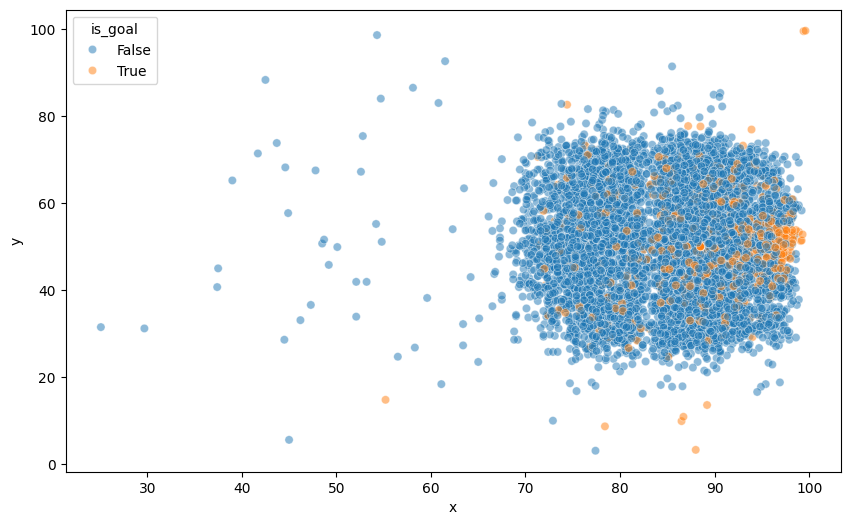

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df, hue='is_goal', alpha=0.5)

In [18]:
df.isna().sum()

x                     0
y                     0
is_goal               0
period                0
Assisted           2053
Zone                  0
IndividualPlay     5289
RegularPlay        2714
LeftFoot           5307
RightFoot          4106
FromCorner         6903
FirstTouch         4166
Head               6793
BigChance          6484
SetPiece           7704
Volley             7281
FastBreak          7476
ThrowinSetPiece    7904
Penalty            7985
OneOnOne           7890
KeyPass            8033
OtherBodyPart      8067
dtype: int64

In [19]:
# Replacing all Null values with False, part of data cleaning
df.fillna(0, inplace=True)

In [20]:
print(df.columns)

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart'],
      dtype='object')


In [21]:
df = df.astype({
    'x': float,
    'y': float,
    'is_goal': bool,
    'period': str,
    'Assisted': bool,
    'Zone': str,
    'IndividualPlay':bool,
    'RegularPlay':bool,
    'LeftFoot':bool,
    'RightFoot':bool,
    'FromCorner':bool,
    'FirstTouch':bool, 
    'Head':bool,
    'BigChance': bool,
    'SetPiece': bool,
    'Volley': bool,
    'FastBreak':bool,
    'ThrowinSetPiece':bool,
    'Penalty':bool, 
    'OneOnOne':bool,
    'KeyPass': bool,
    'OtherBodyPart': bool
})

#casting all of the columns to the correct data types

In [22]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted              bool
Zone                object
IndividualPlay        bool
RegularPlay           bool
LeftFoot              bool
RightFoot             bool
FromCorner            bool
FirstTouch            bool
Head                  bool
BigChance             bool
SetPiece              bool
Volley                bool
FastBreak             bool
ThrowinSetPiece       bool
Penalty               bool
OneOnOne              bool
KeyPass               bool
OtherBodyPart         bool
dtype: object

In [23]:
# FEATURE ENGINEERING
# 1. shot distance  2. Categorical encoding

goal_x, goal_y = 100, 50

# shot distance = euclidean distance from goal
df["shot_distance"] = np.sqrt((df['x'] - goal_x)**2 + (df['y'] - goal_y)**2)


<Axes: >

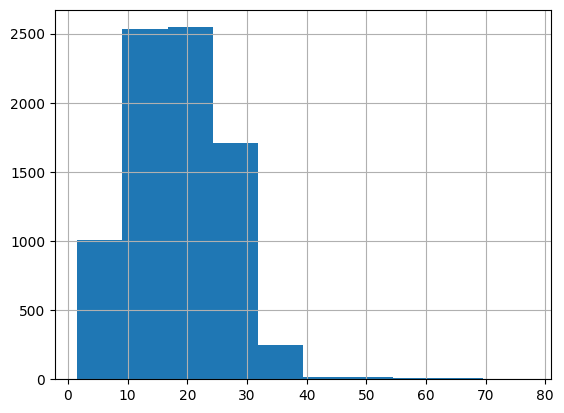

In [24]:
df['shot_distance'].hist()

In [28]:
# categorical encoding - turning our non-boolean values into boolean values for the models usage
# df = pd.get_dummies(df, columns=['period', 'Zone'])
df = pd.get_dummies(df, columns=['period', 'Zone'])

df.columns

Index(['x', 'y', 'is_goal', 'Assisted', 'IndividualPlay', 'RegularPlay',
       'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch', 'Head',
       'BigChance', 'SetPiece', 'Volley', 'FastBreak', 'ThrowinSetPiece',
       'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart', 'shot_distance',
       'period_FirstHalf', 'period_SecondHalf', 'Zone_Back', 'Zone_Center',
       'Zone_Left', 'Zone_Right'],
      dtype='object')

In [29]:
print(df.period_FirstHalf.value_counts())
df.period_SecondHalf.value_counts()

period_FirstHalf
False    4333
True     3758
Name: count, dtype: int64


period_SecondHalf
True     4333
False    3758
Name: count, dtype: int64

In [30]:
# MODEL BUILDING
X = df.drop('is_goal', axis=1)
y = df['is_goal']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression(max_iter=1000)


In [34]:
model.fit(X_train, Y_train)

c:\Projects\python\xg_code\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
y_pred_prob = model.predict_proba(X_test)[:, -1]

In [36]:
y_pred_prob[0:10]
# these are the probabilities of goal

array([0.07406971, 0.35013512, 0.03646602, 0.03682722, 0.09872309,
       0.03809285, 0.03416306, 0.04810293, 0.04583081, 0.03896361])

In [37]:
final_df = X_test.copy()
final_df['goal_probability'] = y_pred_prob

In [38]:
final_df.iloc[450]

x                         77.2
y                         66.2
Assisted                  True
IndividualPlay            True
RegularPlay              False
LeftFoot                 False
RightFoot                 True
FromCorner               False
FirstTouch                True
Head                     False
BigChance                False
SetPiece                 False
Volley                   False
FastBreak                 True
ThrowinSetPiece          False
Penalty                  False
OneOnOne                 False
KeyPass                  False
OtherBodyPart            False
shot_distance        27.969269
period_FirstHalf          True
period_SecondHalf        False
Zone_Back                False
Zone_Center               True
Zone_Left                False
Zone_Right               False
goal_probability      0.039401
Name: 2413, dtype: object

In [52]:
final_df.sort_values(by='goal_probability', ascending=False).head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,BigChance,SetPiece,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,goal_probability
3671,88.5,50.0,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,11.5,False,True,False,True,False,False,0.841746
381,88.5,50.0,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,11.5,False,True,False,True,False,False,0.841746
1323,88.5,50.0,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,11.5,False,True,False,True,False,False,0.841746
6619,88.5,50.0,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,11.5,False,True,False,True,False,False,0.841746
50,88.5,50.0,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,11.5,False,True,False,True,False,False,0.838078


In [40]:
logloss = log_loss(Y_test, y_pred_prob)
roc_auc = roc_auc_score(Y_test, y_pred_prob)
brier_score = brier_score_loss(Y_test, y_pred_prob)

print(f"Log Loss: {logloss}")
print(f"ROC AUC: {roc_auc}")
print(f"Brier Score: {brier_score}")

Log Loss: 0.2692813091195626
ROC AUC: 0.8117292834419028
Brier Score: 0.07726424267767673


In [41]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='opta')

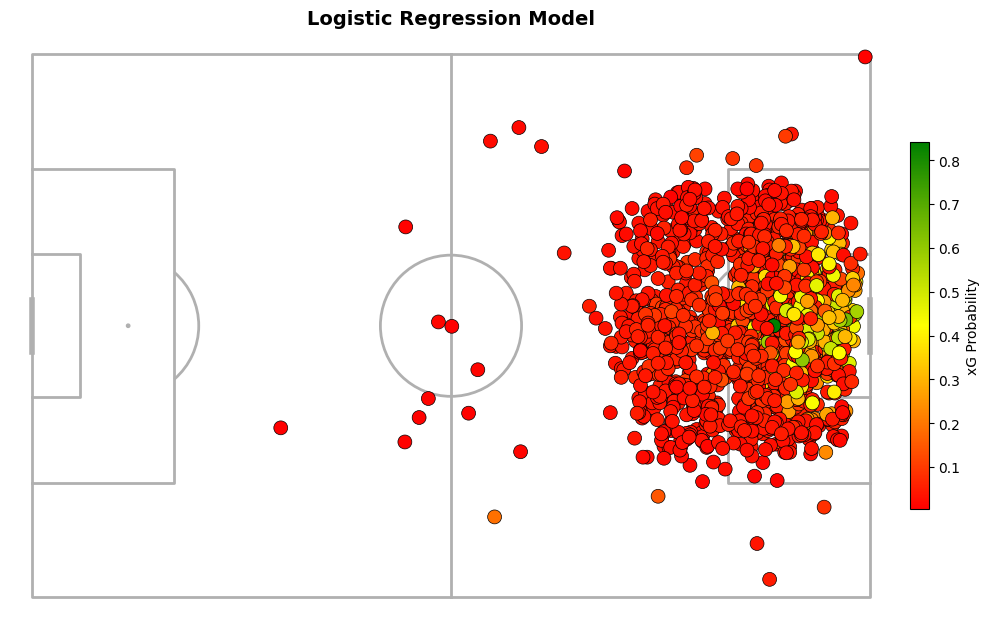

In [64]:
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the gradient
colors = ['red', 'yellow', 'green']

# Create the custom colormap
cmap = LinearSegmentedColormap.from_list('my_colormap', colors)

fig, ax = pitch.draw(figsize=(10, 8))

# Scatter plot for shots with xG as the color
sc = pitch.scatter(
    final_df['x'], 
    final_df['y'],  # Shot coordinates
    c=final_df['goal_probability'],  # xG probabilities for color
    cmap=cmap,  # Red to green gradient
    edgecolors='black', linewidth=0.5, s=100,  # Point styling
    ax=ax
)
plt.title("Logistic Regression Model", fontsize=14, fontweight='bold')

# Add a color bar to indicate xG values
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('xG Probability')

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']},  
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']}  
]

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, brier_score_loss

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, Y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_preds = (rf_probs >= 0.5).astype(int)

In [47]:
# Logistic Regression Predictions (if not already computed)
log_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
log_preds = (log_probs >= 0.5).astype(int)

# Calculate Metrics
metrics = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(Y_test, log_preds),
        accuracy_score(Y_test, rf_preds)
    ],
    "ROC AUC": [
        roc_auc_score(Y_test, log_probs),
        roc_auc_score(Y_test, rf_probs)
    ],
    "Log Loss": [
        log_loss(Y_test, log_probs),
        log_loss(Y_test, rf_probs)
    ],
    "Brier Score": [
        brier_score_loss(Y_test, log_probs),
        brier_score_loss(Y_test, rf_probs)
    ]
}

import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                 Model  Accuracy   ROC AUC  Log Loss  Brier Score
0  Logistic Regression  0.893144  0.812237  0.269816     0.077468
1        Random Forest  0.901174  0.823385  0.268154     0.077065


In [ ]:
# Random forest is slightly better than Logistic regression

In [53]:
rf_final_df = X_test.copy()
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, -1]


In [54]:
y_pred_prob_rf[0:10]

array([0.09131548, 0.7676893 , 0.12505585, 0.02884796, 0.079567  ,
       0.02653762, 0.02047757, 0.04461995, 0.04178466, 0.03325286])

In [55]:
rf_final_df['goal_probability'] = y_pred_prob_rf

In [61]:
# print(rf_final_df.iloc[450])
# final_df.iloc[450]

comparision_df  = pd.concat([final_df.iloc[450], rf_final_df.iloc[450]], axis=1)
comparision_df.columns = ["Logistic Regression", "Random Forest"]
print(comparision_df)

                  Logistic Regression Random Forest
x                                77.2          77.2
y                                66.2          66.2
Assisted                         True          True
IndividualPlay                   True          True
RegularPlay                     False         False
LeftFoot                        False         False
RightFoot                        True          True
FromCorner                      False         False
FirstTouch                       True          True
Head                            False         False
BigChance                       False         False
SetPiece                        False         False
Volley                          False         False
FastBreak                        True          True
ThrowinSetPiece                 False         False
Penalty                         False         False
OneOnOne                        False         False
KeyPass                         False         False
OtherBodyPar

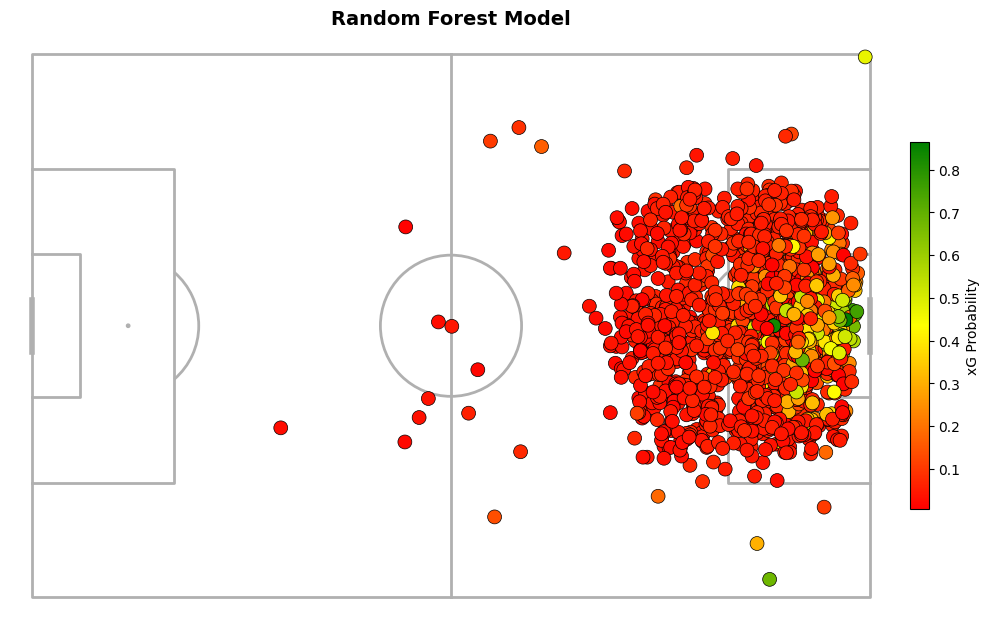

In [63]:
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the gradient
colors = ['red', 'yellow', 'green']

# Create the custom colormap
cmap = LinearSegmentedColormap.from_list('my_colormap', colors)

fig, ax = pitch.draw(figsize=(10, 8))

# Scatter plot for shots with xG as the color
sc = pitch.scatter(
    rf_final_df['x'], 
    rf_final_df['y'],  # Shot coordinates
    c=rf_final_df['goal_probability'],  # xG probabilities for color
    cmap=cmap,  # Red to green gradient
    edgecolors='black', linewidth=0.5, s=100,  # Point styling
    ax=ax
)
plt.title("Random Forest Model", fontsize=14, fontweight='bold')

# Add a color bar to indicate xG values
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('xG Probability')